# Data generation 

## Installation

```bash
conda env create -f environment.yml
conda activate rpy
python -m ipykernel install --user --name rpy
```


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We generate synthetic data according to

$$
y(x) = a x + b x^2 + c \sin(x^2) + \cal{N}(0, \epsilon)
$$

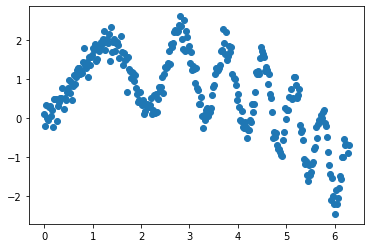

In [2]:
npts = 300
eps = 0.2  # noise
a, b, c  = 1, -0.2, 1 # model coefficients

np.random.seed(1234)
x = np.linspace(0, 2*np.pi, npts)
y = a*x + b*x**2 + c*np.sin(x**2) + np.random.normal(scale=eps, size=npts)
plt.plot(x, y, 'o');

Write it to a CSV file for convenient retrieval in a "typical" workflow, Pandas does the job nicely:

In [6]:
data = pd.DataFrame({'x':x, 'y':y})
data.head(3)

,x,y
0,0.000000,0.094287
1,0.021014,-0.216828
2,0.042028,0.329982


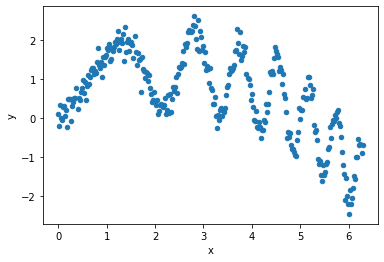

In [7]:
data.plot.scatter(x='x', y='y');


## Statistical modeling with R

We now have our data y and our features $x$, $f_2 = x^2$ and $f_3 = \sin(x^2)$. This is a classic linear modeling problem, and R is awesome at fitting those!

Let's put our features together in a nice design matrix and load up R:

In [10]:
x = data['x']
f2 = x**2
f3 = np.sin(x**2)

In [13]:
A = np.c_[x, f2, f3]
A.shape

(300, 3)

In [14]:
%load_ext rpy2.ipython
y = data['y']


Call:
lm(formula = y ~ 0 + A)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7186 -0.1182  0.0090  0.1275  0.5450 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
A1  1.000707   0.012517   79.95   <2e-16 ***
A2 -0.199631   0.002566  -77.81   <2e-16 ***
A3  1.015147   0.016646   60.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1958 on 297 degrees of freedom
Multiple R-squared:  0.9741,	Adjusted R-squared:  0.9739 
F-statistic:  3730 on 3 and 297 DF,  p-value: < 2.2e-16



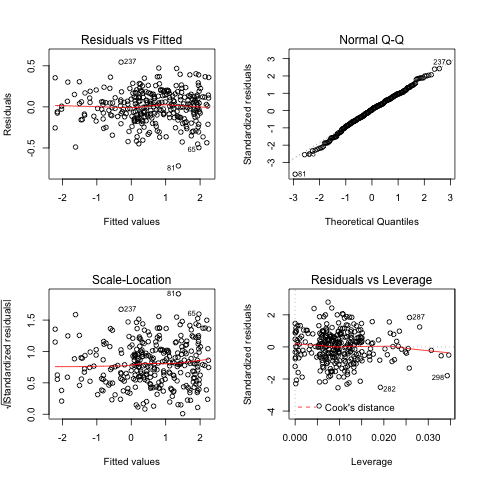

In [15]:
%%R -i y,A -o fitc

ylm = lm(y ~ 0 + A)
fitc = coef(ylm)
print(summary(ylm))
par(mfrow=c(2,2))
plot(ylm)

Back to Python to look at the results!
R gave us our fit coefficient vector fitc, we can now proceed using it:

In [18]:
fitc

array([ 1.00070744, -0.19963147,  1.01514731])

In [19]:
yfit = A @ fitc

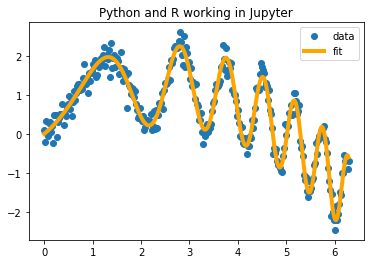

In [20]:
plt.plot(x, y, 'o', label='data')
plt.plot(x, yfit, label='fit', color='orange', lw=4)
plt.title('Python and R working in Jupyter')
plt.legend();